**Detection and removal of outliers using percentile method**

In [13]:
import pandas as pd

df = pd.read_csv('heights.csv')
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [14]:
max_threshold = df['height'].quantile(0.95)
max_threshold
# 9.68's percentile is 95%, and anything above this COULD be an outlier

9.689999999999998

In [15]:
df[df['height']>max_threshold]

#Here, the height value of 14.5 is >9.68, and hence it an outlier

,name,height
9,imran,14.5


In [16]:
min_threshold = df['height'].quantile(0.05)
min_threshold
# 3.6's percentile is 5%, and anything below this COULD be an outlier

3.6050000000000004

In [17]:
df[df['height']<min_threshold]
#Here, the height value of 1.2 is <3.6, and hence it an outlier

,name,height
12,yoseph,1.2


In [18]:
df[(df['height']>min_threshold) & (df['height']<max_threshold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khushbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


**Removing Outliers in a Air BNB NYC dataset**

In [19]:
df = pd.read_csv('nyc_housing.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0


In [20]:
#Targeting price column
df['price']

0        149.0
1        225.0
2        150.0
3         89.0
4         80.0
         ...  
14776     38.0
14777     85.0
14778    145.0
14779     29.0
14780      NaN
Name: price, Length: 14781, dtype: float64

In [21]:
#Setting a max & min threshold for 'price' column
max_threshold=df['price'].quantile(0.95)
print(max_threshold)

min_threshold=df['price'].quantile(0.05)
min_threshold

350.0


45.0

In [22]:
#Anything above max_threshold and below min_threshold would be an outlier
new_df = df[(df['price']<max_threshold) & (df['price']>min_threshold)]
new_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,11676984,Luxury STUDIO * PVT Entrance * WOW,62014546,Nissim,Manhattan,Upper East Side,40.77654,-73.94904,Entire home/apt,165.0,1.0,141.0,2019-06-23,3.54,1.0,262.0
14774,11677431,Serene and Minimal Room + Studio,3850478,Lili,Brooklyn,Greenpoint,40.72435,-73.94004,Private room,50.0,1.0,0.0,NaN,NaN,1.0,0.0
14775,11677489,1 BR APT LOWER EAST SIDE,8756821,Franco,Manhattan,Chinatown,40.71555,-73.99091,Entire home/apt,180.0,2.0,10.0,2017-10-02,0.25,1.0,0.0
14777,11679675,Huge Brooklyn Studio,61553719,Katrina,Brooklyn,Bedford-Stuyvesant,40.68205,-73.94469,Entire home/apt,85.0,2.0,39.0,2018-11-17,0.98,1.0,190.0


**Removing Outliers using standard deviation**

In [23]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

df = pd.read_csv('height.csv')
df.sample(5)

,Gender,Height
1659,Male,69.011161
9718,Female,64.642218
9616,Female,61.233094
837,Male,72.987171
2274,Male,66.166465


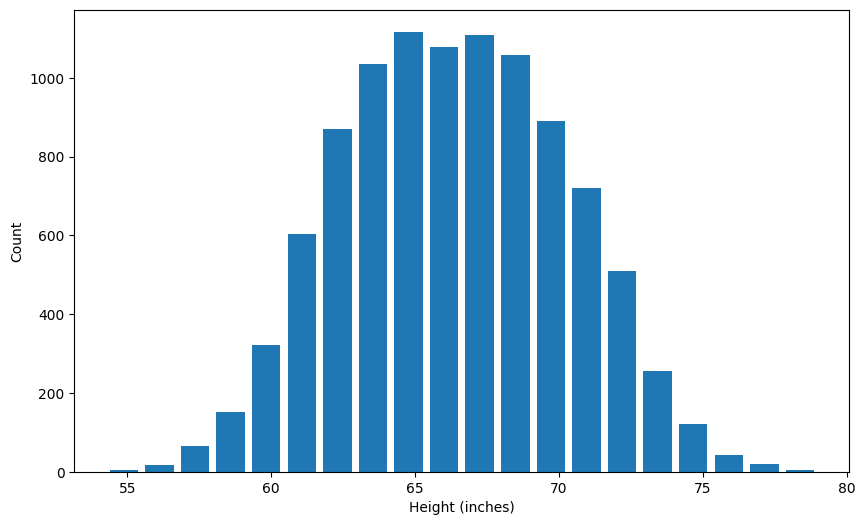

In [24]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

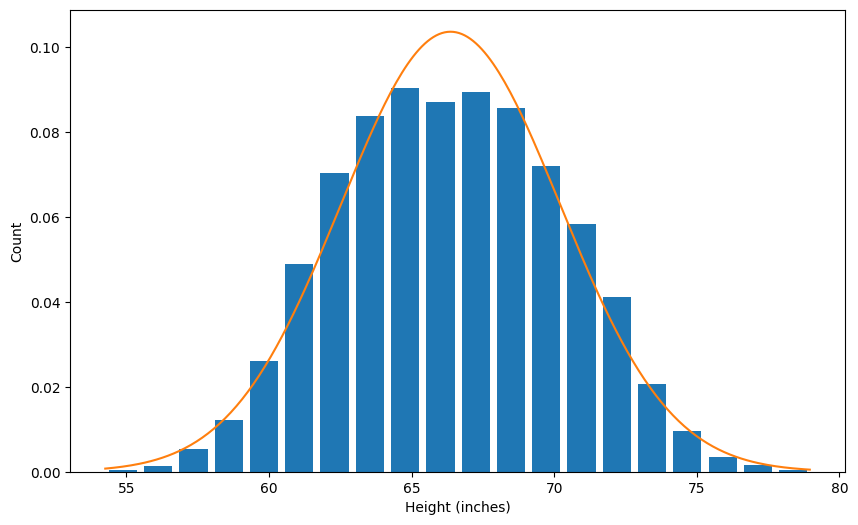

In [25]:
from scipy.stats import norm

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
# gives evenly spaced values b/w min and max heights

# print(rng)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

In [26]:
df.Height.mean()

66.367559754866

In [27]:
df.Height.std()

3.847528120795573

In [28]:
#Using 3 standard deviation to determine outliers
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411725271

In [29]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.824975392479274

In [30]:
#Display outliers
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [33]:
#Removing outliers from our dataset
df_no_outlier_std = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [32]:
df.shape[0] - df_no_outlier_std.shape[0]
#shape[0] = number of rows
#7 rows have been removed

7

**Removing Outliers using Z-Score**

In [35]:
df['zscore'] = (df.Height - df.Height.mean()) / df.Height.std()
df.head(5)
#Larger the z-score for a record, the far it is from the average, this can indicate an outlier

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [38]:
#Considering z-score>3 & <-3 to be outliers
df[(df.zscore>3) | (df.zscore<-3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [39]:
#Removing outliers from our dataset
df_no_outlier_zscore = df[(df.zscore<3) & (df.zscore>-3)]
df_no_outlier_zscore

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


**Exercise - Remove outliers in a banglore housing dataset using percentile, std & zscore**

In [40]:
#Using percentile
df = pd.read_csv('/content/banglore_housing.csv')
df
#Target = price_per_sqft

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [41]:
max_threshold = df['price_per_sqft'].quantile(0.96)
max_threshold
#96% values lie below 16500

16500.0

In [42]:
min_threshold = df['price_per_sqft'].quantile(0.05)
min_threshold
#5% values lie below 3107

3107.8500000000004

In [43]:
new_df_percentile = df[(df.price_per_sqft<max_threshold) & (df.price_per_sqft>min_threshold)]
new_df_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [65]:
new_df_percentile.price_per_sqft.mean()

6240.6786279244025

In [66]:
#Removing outliers using 4 standard deviation from the mean on both the side
upper_limit = new_df_percentile.price_per_sqft.mean() + 4*new_df_percentile.price_per_sqft.std()
upper_limit

16998.433716195483

In [67]:
#Removing outliers using 4 standard deviation from the mean on both the side
lower_limit = new_df_percentile.price_per_sqft.mean() - 4*new_df_percentile.price_per_sqft.std()
lower_limit

-4517.07646034668

In [68]:
new_df_std = new_df_percentile[(new_df_percentile.price_per_sqft<upper_limit) & (new_df_percentile.price_per_sqft>lower_limit)]
new_df_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


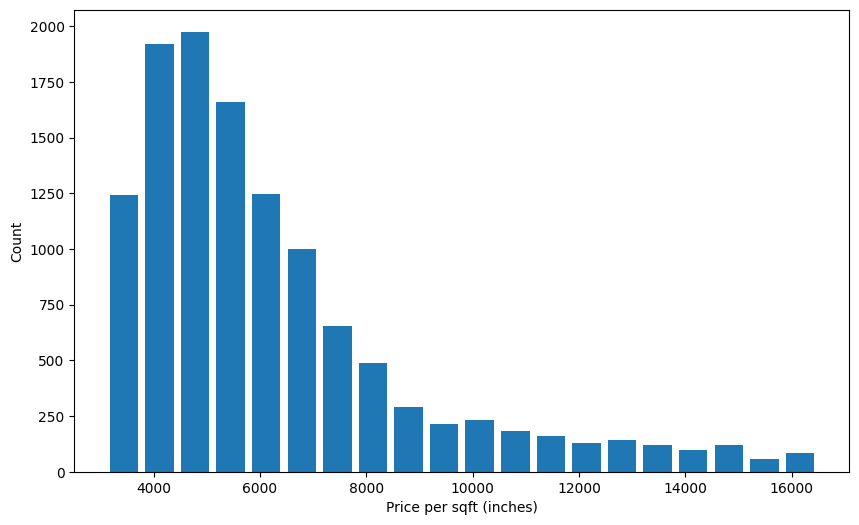

In [70]:
plt.hist(new_df_std.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqft (inches)')
plt.ylabel('Count')
plt.show()

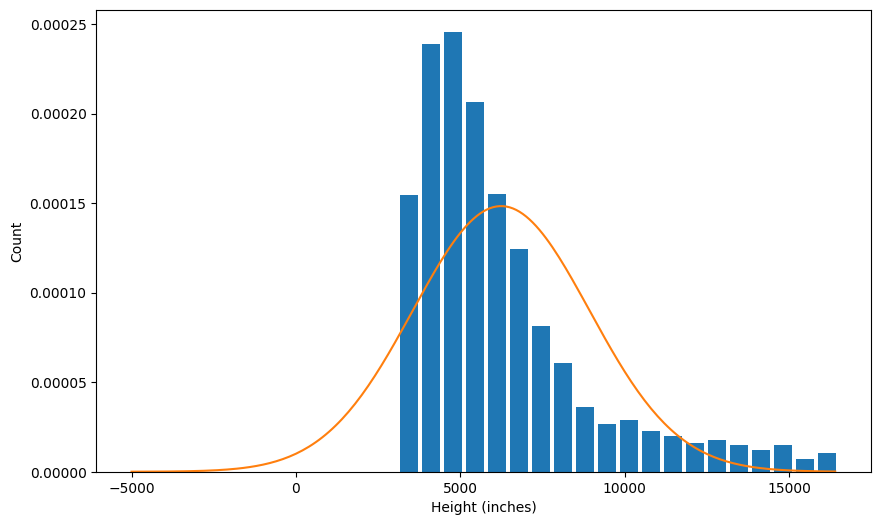

In [73]:
plt.hist(new_df_std.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, new_df_std.price_per_sqft.max(), 100)
# gives evenly spaced values b/w min and max heights

# print(rng)
plt.plot(rng, norm.pdf(rng, new_df_std.price_per_sqft.mean(), new_df_std.price_per_sqft.std()))

In [79]:
#Removing outliers from our dataset using Z-score for 3 std
new_df_std['zscore'] = (new_df_std.price_per_sqft - new_df_std.price_per_sqft.mean())/new_df_std.price_per_sqft.std()
new_df_std.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zcore,zscore
7936,Mysore Road,3 BHK,1568.0,2.0,100.00,3,6377,0.050688,0.050688
285,other,2 BHK,1084.0,2.0,50.00,2,4612,-0.605583,-0.605583
1395,Bannerghatta Road,3 BHK,1654.0,3.0,100.00,3,6045,-0.072758,-0.072758
8855,8th Phase JP Nagar,2 BHK,1089.0,2.0,43.55,2,3999,-0.833512,-0.833512
6343,other,4 Bedroom,900.0,3.0,51.00,4,5666,-0.213680,-0.213680


In [82]:
df_no_outlier_zscore = new_df_std[(new_df_std.zscore<3) & (new_df_std.zscore>-3)]
df_no_outlier_zscore.shape

(11735, 9)

In [83]:
new_df_std.shape[0] - df_no_outlier_zscore.shape[0]

276